In [1]:
import pandas as pd
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
import networkx as nx
import random
import spacy
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from umap.umap_ import UMAP


/Users/hana/anaconda3/envs/data/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [25]:
user_path = 'data/users.csv'
user_df = pd.read_csv(user_path)
# Merge data with book metadata
freihand_path = 'data/hertziana_exp/freihand_signatures.csv'
freihand = pd.read_csv(freihand_path)

#Join with Freihand dataset to get more info 
merged_df = user_df.merge(freihand, left_on='Z30_CALL_NO', right_on='signature', how='inner').drop_duplicates()
df = user_df
df

,Z30_CALL_NO,Z30_COLLECTION,Z30_BARCODE,Z30_INVENTORY_NUMBER,Z30_DESCRIPTION,Z30_NO_LOANS,Z36H_LOAN_DATE,Z36H_RETURNED_DATE,Z36H_ID,Z36H_LOAN_CATALOGER_NAME,Z13_TITLE,Year
0,Ha 280-6080,BIB,E004010041AD2DFD,2014.1366,NaN,10.0,2020-08-26,2020-09-02,BHR-1048,SELFCHECK,Die Sprache der Materialien,2020
1,Va 6400-6090,MAG,E0040100413A8184,2009.4815,NaN,64.0,2020-10-22,2020-11-05,MPG000012838,SELFCHECK,The Accademia seminars,2020
2,KatM-AVI 5720-5760/a,BIB,E004010042EB1ED0,1990.2315,NaN,3.0,2020-09-24,2020-10-06,BHR-575,SELFCHECK,"Avignon, Musée du Petit Palais",2020
3,Hm 9000-6110/1,BIB,E004010043854685,2011.2460,NaN,6.0,2020-09-08,2020-09-10,BHR-1062,SELFCHECK,Handbuch der politischen Ikonographie,2020
4,Cm-PON 7500-6112/1,BIB,E004010042EB5DA0,2012.645,NaN,1.0,2020-06-09,2022-02-28,BHR-980,SELFCHECK,Espressioni di Gio Ponti,2020
...,...,...,...,...,...,...,...,...,...,...,...,...
473067,Ca-BAR 1880-6130,BIB,E004010043089554,2013.3436,NaN,NaN,2013-12-13,2013-12-17,MPG000012334,KUBA4R01,Barocci in bottega,2013
473068,Ca-CAR 317-6130,BIB,E004010042EB3D31,2013.3860,NaN,NaN,2013-11-25,2013-11-25,MPG000012906,SELFCHECK,Caravaggio segreto,2013
473069,Hh 2400-6130,BIB,E004010042EB4010,2013.3717,NaN,NaN,2013-12-10,2013-12-10,MPG000012963,SELFCHECK,Aktual- und Realpräsenz,2013
473070,Bt 338-6130,BIB,E00401080C577EE3,2013.4131,NaN,NaN,2013-12-11,2013-12-11,MPG000012933,SELFCHECK,Roma fuori di Roma,2013


In [26]:
df['Z36H_LOAN_DATE'] = pd.to_datetime(df['Z36H_LOAN_DATE'])
df['Z36H_RETURNED_DATE'] = pd.to_datetime(df['Z36H_RETURNED_DATE'])

df['LOAN_TIME'] = (df['Z36H_RETURNED_DATE'] - df['Z36H_LOAN_DATE']).dt.days + 1


In [30]:
oh= pd.get_dummies(df[['Z30_CALL_NO', 'Z36H_ID','LOAN_TINE']], columns=['Z36H_ID'])
features = oh.groupby('Z30_CALL_NO')



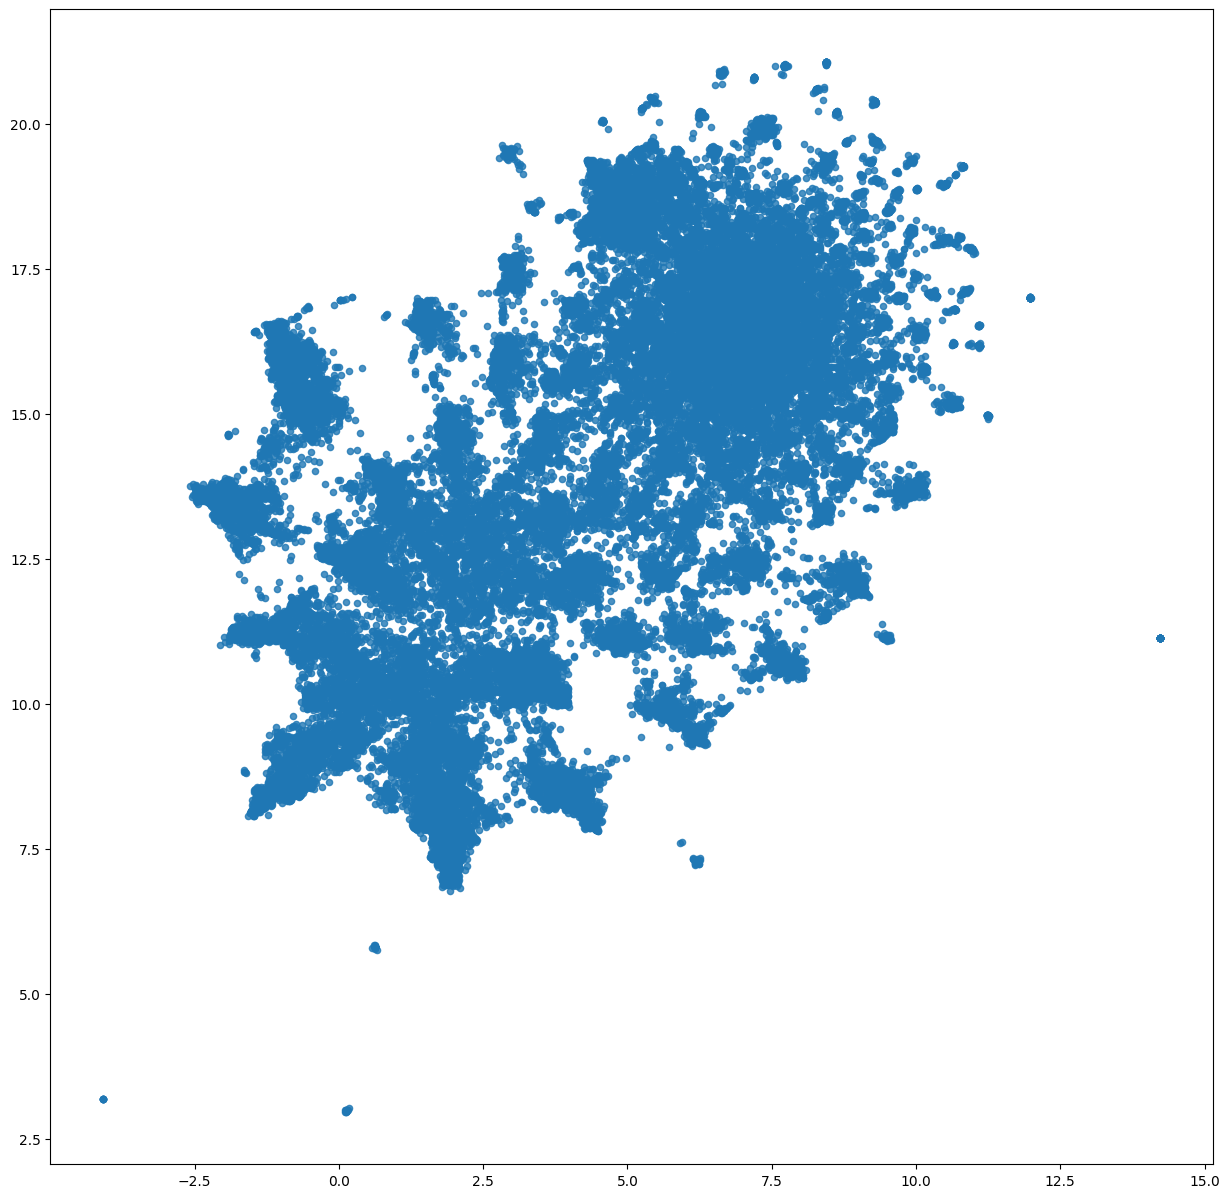

In [31]:
umap = UMAP(n_components=2).fit_transform(features)

fig, ax = plt.subplots(figsize=(15, 15))

plt.scatter(umap[:, 0], umap[:, 1], s=20, alpha=0.8)
plt.show()